In [66]:
import pandas as pd # import pandas library for data cleaning and manipulation

In [67]:
df = pd.read_csv("Sales_April_2019.csv") # read one file and check the output to see the data 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [68]:
### Merging 12 months of data into a single file because it is easier to deal with one file instead of 12

df_full = pd.concat(map(pd.read_csv,['Sales_April_2019.csv','Sales_August_2019.csv','Sales_December_2019.csv','Sales_February_2019.csv','Sales_January_2019.csv','Sales_July_2019.csv','Sales_June_2019.csv','Sales_March_2019.csv','Sales_May_2019.csv','Sales_November_2019.csv','Sales_October_2019.csv','Sales_September_2019.csv']))
df_full

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [69]:
df_full.to_csv("all_data.csv",index=False) # save the merged file

In [70]:
df_full.head() # check the full file data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### This data has some NaN rows that we need to find and drop them because they present problems.

In [71]:
df_nan = df_full[df_full.isna().any(axis=1)] # find the rows the has NaN in them and display them.
df_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


### Augment the data with additional column(s) for month and convert the month column into int etc

In [72]:
# drop all the NaN rows from the full data

df_full = df_full.dropna(how="all")
df_full.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [73]:
df_full ['Month']= df_full['Order Date'].str[0:2] # add a column for the month
df_full.head() 

/var/folders/y1/m3m9qzps3_5gyg0tnj0jsldm0000gn/T/ipykernel_19616/762854360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full ['Month']= df_full['Order Date'].str[0:2] # add a column for the month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [74]:
# find "Or" and delete those rows. Delete the rows that have the month as Or

df_full = df_full[df_full['Order Date'].str[0:2] != 'Or']
df_full

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [80]:
df_full ['Month'] = df_full['Order Date'].str[0:2]
df_full ['Month'] = df_full['Month'].astype('int32')

# convert the two columns below into float and integer type to multiply them. They are originally in the string type.

df_full ['Price Each'] = df_full['Price Each'].astype('float64')
df_full ['Quantity Ordered'] = df_full['Quantity Ordered'].astype('int32')
df_full.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,4,4.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,4,4.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,4,4.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,4,4.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,4,4.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [81]:
df_full.value_counts # check the number rows in the full dataframe

<bound method DataFrame.value_counts of       Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable                 4         4.0   
2       176559  Bose SoundSport Headphones                 4         4.0   
3       176560                Google Phone                 4         4.0   
4       176560            Wired Headphones                 4         4.0   
5       176561            Wired Headphones                 4         4.0   
...        ...                         ...               ...         ...   
11681   259353      AAA Batteries (4-pack)                 9         9.0   
11682   259354                      iPhone                 9         9.0   
11683   259355                      iPhone                 9         9.0   
11684   259356      34in Ultrawide Monitor                 9         9.0   
11685   259357        USB-C Charging Cable                 9         9.0   

           Order Date                         P

### Question 1: What was the best month for sales? How much was the earned revenue that month?

In [86]:
# Add another column that shows the total revenue per sale (sales) i-e multiply the price each and qunatity ordered

df_full['Sales'] = df_full['Quantity Ordered'] * df_full['Price Each']
df_full.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,4,4.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,16.0
2,176559,Bose SoundSport Headphones,4,4.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,16.0
3,176560,Google Phone,4,4.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,16.0
4,176560,Wired Headphones,4,4.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,16.0
5,176561,Wired Headphones,4,4.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,16.0


### Question 01: What was the best month for sales? How much was earned that month?

In [89]:
results = df_full.groupby('Month').sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,9709,9709.0,9709.0
2,23950,23950.0,47900.0
3,45459,45459.0,136377.0
4,73116,73116.0,292464.0
5,82830,82830.0,414150.0


### Visualization

Text(0.5, 0, 'Month')

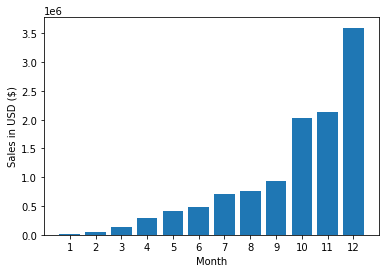

In [91]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month")

### What US City had the highest number sales?

In [92]:
# Augment the data with a city(state) column
df_full_addresses = df_full['Purchase Address']
df_full_addresses.head()

0            917 1st St, Dallas, TX 75001
2       682 Chestnut St, Boston, MA 02215
3    669 Spruce St, Los Angeles, CA 90001
4    669 Spruce St, Los Angeles, CA 90001
5       333 8th St, Los Angeles, CA 90001
Name: Purchase Address, dtype: object

In [104]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df_full['City'] = df_full['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df_full.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,4,4.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,16.0,Dallas (TX)
2,176559,Bose SoundSport Headphones,4,4.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,16.0,Boston (MA)
3,176560,Google Phone,4,4.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)
4,176560,Wired Headphones,4,4.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)
5,176561,Wired Headphones,4,4.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)


### Question 2: Which city had the highest sales?

In [106]:
results = df_full.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),104794,104794.0,104794,920566.0
Austin (TX),69829,69829.0,69829,613943.0
Boston (MA),141112,141112.0,141112,1244234.0
Dallas (TX),104620,104620.0,104620,920946.0
Los Angeles (CA),208325,208325.0,208325,1827919.0
New York City (NY),175741,175741.0,175741,1547683.0
Portland (ME),17144,17144.0,17144,149414.0
Portland (OR),70621,70621.0,70621,620411.0
San Francisco (CA),315520,315520.0,315520,2775928.0


Text(0.5, 0, 'City')

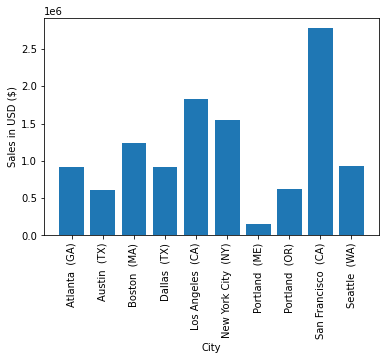

In [109]:
import matplotlib.pyplot as plt
cities = [city for city, df in df_full.groupby('City')]

plt.bar(cities,results["Sales"])
plt.xticks(cities, rotation='vertical')
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")

### What time should we display advertisments to maximise the likelihood of customer's buying the product?


In [110]:
df_full.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,4,4.0,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,16.0,Dallas (TX)
2,176559,Bose SoundSport Headphones,4,4.0,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,16.0,Boston (MA)
3,176560,Google Phone,4,4.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)
4,176560,Wired Headphones,4,4.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)
5,176561,Wired Headphones,4,4.0,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)


In [111]:
# we need to look at the order date and figure out a way to aggregate all the data into 24 hours period. Parch the order date like a string.
# use the datetime library from python to convert the order date (string) into proper date format

df_full['Order Date'] = pd.to_datetime(df_full['Order Date'])

In [112]:
df_full.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,4,4.0,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,16.0,Dallas (TX)
2,176559,Bose SoundSport Headphones,4,4.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,16.0,Boston (MA)
3,176560,Google Phone,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)
4,176560,Wired Headphones,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)
5,176561,Wired Headphones,4,4.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA)


In [119]:
# adding an hour and minute column in the dataframe

df_full['Hour'] = df_full['Order Date'].dt.hour
df_full['Minute'] = df_full['Order Date'].dt.minute
df_full['Count'] = 1
df_full.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,4,4.0,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,16.0,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,4,4.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,16.0,Boston (MA),22,30,1
3,176560,Google Phone,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,4,4.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),9,27,1


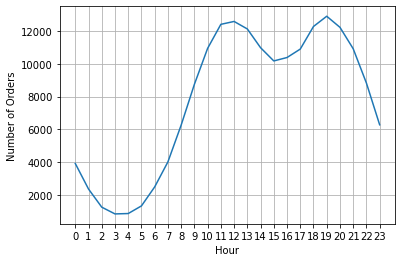

In [122]:
keys = [pair for pair, df in df_full.groupby(['Hour'])]

plt.plot(keys, df_full.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### What products are most often sold together?

In [123]:
df_full.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,4,4.0,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,16.0,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,4,4.0,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,16.0,Boston (MA),22,30,1
3,176560,Google Phone,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,4,4.0,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),9,27,1


We need to find the products with the same order ID because if they are ordered together, that means that order will have one order ID.
Count the duplicate order ID and then look up the corresponding product. 

In [125]:
# we want to know all the spots in our data frame that have duplicate order IDs. Create a new dataframe and filter by order ID and then
# check the duplicate.

df_new = df_full[df_full['Order ID'].duplicated(keep=False)] # converted the full big dataframe into this smaller one with just the 
# duplicated values.

df_new.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),14,38,1
18,176574,Google Phone,4,4.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,4,4.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,4,4.0,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,16.0,Boston (MA),11,31,1
31,176585,Bose SoundSport Headphones,4,4.0,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,16.0,Boston (MA),11,31,1
32,176586,AAA Batteries (4-pack),4,4.0,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,16.0,San Francisco (CA),17,0,1
33,176586,Google Phone,4,4.0,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,16.0,San Francisco (CA),17,0,1
119,176672,Lightning Charging Cable,4,4.0,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,16.0,New York City (NY),11,7,1
120,176672,USB-C Charging Cable,4,4.0,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,16.0,New York City (NY),11,7,1


In [128]:
 # create a new column to get the product in one place that have the same order ID

 df_new['Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
 df_new.head()

/var/folders/y1/m3m9qzps3_5gyg0tnj0jsldm0000gn/T/ipykernel_19616/2510212677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Grouped'] = df_new.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,4,4.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,4,4.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,4,4.0,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,16.0,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,4,4.0,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,16.0,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [131]:
# Drop the duplicates now

df_new = df_new[['Order ID','Grouped']].drop_duplicates()
df_new.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [132]:
# count the pairs of what occurs together the most frequently

from itertools import combinations
from collections import Counter

count = Counter()

for row in df_new['Grouped']: # for every row in the df_new dataframe's column named "Grouped"
    row_list = row.split(',') # split the row based on ',' and store those words in row_list
    count.update(Counter(combinations(row_list, 2))) # 2 most commonly items sold together. 

for key,value in count.most_common(10): # dictionary for the top 10 most common items purchased together. count.most_common is a mehtod.
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

In [134]:
product_group = df_full.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,29336,29336.0,29336,260054.0,58764,122252,4101
27in 4K Gaming Monitor,44440,44440.0,44440,393326.0,90916,184331,6230
27in FHD Monitor,52558,52558.0,52558,459356.0,107540,219948,7507
34in Ultrawide Monitor,43304,43304.0,43304,379732.0,89076,183480,6181
AA Batteries (4-pack),145558,145558.0,145558,1279336.0,298342,609039,20577
AAA Batteries (4-pack),146370,146370.0,146370,1292554.0,297332,612113,20641
Apple Airpods Headphones,109477,109477.0,109477,961703.0,223304,455570,15549
Bose SoundSport Headphones,94113,94113.0,94113,827363.0,192445,392603,13325
Flatscreen TV,34224,34224.0,34224,302446.0,68815,142789,4800


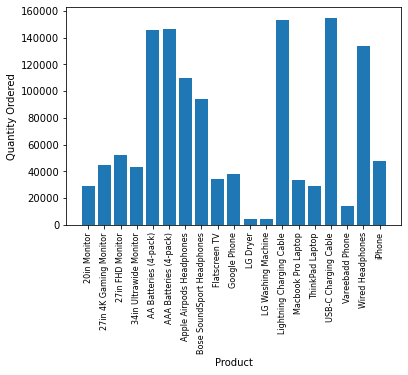

In [138]:
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel('Product')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [141]:
# overlay the prices of items on the order quantity to see the correlation between the price of the product and the quantity ordered

prices = df_full.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                  7.153377
27in 4K Gaming Monitor        7.133226
27in FHD Monitor              7.001199
34in Ultrawide Monitor        7.005986
AA Batteries (4-pack)         7.073820
AAA Batteries (4-pack)        7.091226
Apple Airpods Headphones      7.040774
Bose SoundSport Headphones    7.062889
Flatscreen TV                 7.130000
Google Phone                  6.933032
LG Dryer                      6.784830
LG Washing Machine            6.791291
Lightning Charging Cable      7.068612
Macbook Pro Laptop            7.101609
ThinkPad Laptop               7.013081
USB-C Charging Cable          7.068392
Vareebadd Phone               6.929298
Wired Headphones              7.064771
iPhone                        7.006869
Name: Price Each, dtype: float64


/var/folders/y1/m3m9qzps3_5gyg0tnj0jsldm0000gn/T/ipykernel_19616/563728229.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
/var/folders/y1/m3m9qzps3_5gyg0tnj0jsldm0000gn/T/ipykernel_19616/563728229.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


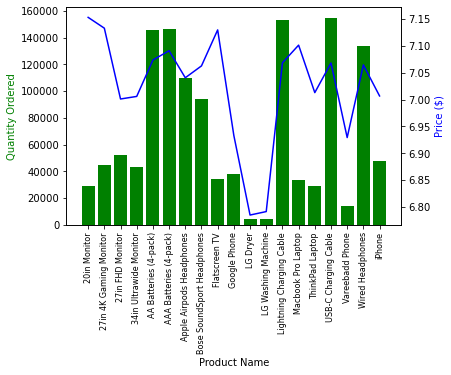

In [142]:
prices = df_full.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()